### k-Means
- 대표적인 군집 알고맂므으로 군집의 중심을 찾는 작업  
- cluster : 군집  
- clustering : 군집화 하는 작업  
- 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

fruits = np.load("../data/fruits.npy")
fruits.shape

(300, 100, 100)

In [4]:
# 3차원 데이터를 2ㅏ원 데이터로 변경하기

fruits_2d = fruits.reshape(fruits.shape[0], -1)
fruits_2d.shape

(300, 10000)

### k-Means Model

In [6]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)

km.fit(fruits_2d)


KMeans(n_clusters=3, random_state=42)

In [7]:
# 군집화한 Label 출력해 보기

km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

> 군집화 이므로 Target이 뭔지 몰라 숫자값으로 표현됨

In [11]:
# 군집화한 cluster 갯수와 각 cluster갯수 찾기

np.unique(km.labels_, return_counts = True)

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))

In [12]:
# Cluster0이 112개인지 확..인?

count0 = 0

for i in km.labels_:
    if i == 0:
        count0 +=1

print(count0)

112


---
### 첫번째 클러스터 확인

In [13]:
import matplotlib.pyplot as plt

In [16]:
def draw_fruits(arr, ratio = 1): # ratio : 해상도 크기
    n = len(arr) # n : 샘플 갯수
    # 한줄에 10개씩 이미지 그린다.
    rows = int(np.ceil(n/10)) # 올림처리
    # 행이 1개이면 열 갯수는 샘플 갯수. 그렇지 않으면 10개 
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(
                            rows,
                            cols,
                            figsize = (cols * ratio, rows * ratio),
                            squeeze=False   #   squeeze : 한줄로그리지말자
    )
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap = 'gray_r')
            axs[i, j].axis('off')
    plt.show()




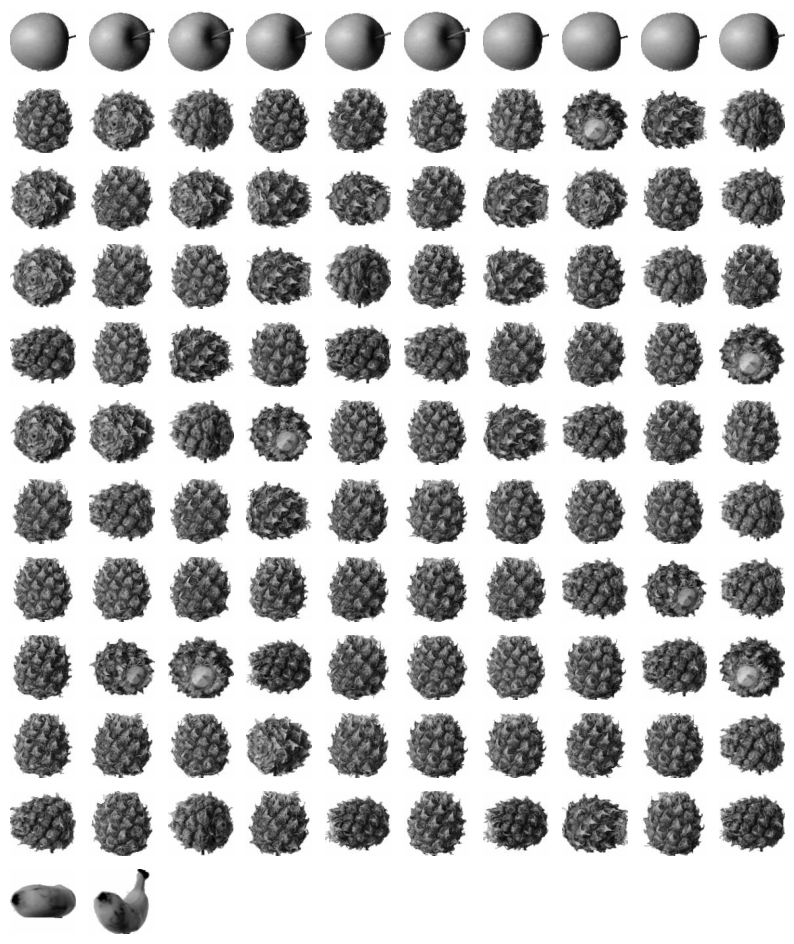

In [17]:
draw_fruits(fruits[km.labels_ == 0])

> 파인애플 그림이 제일 많으므로, 클러스터 0은 파인애플이다.

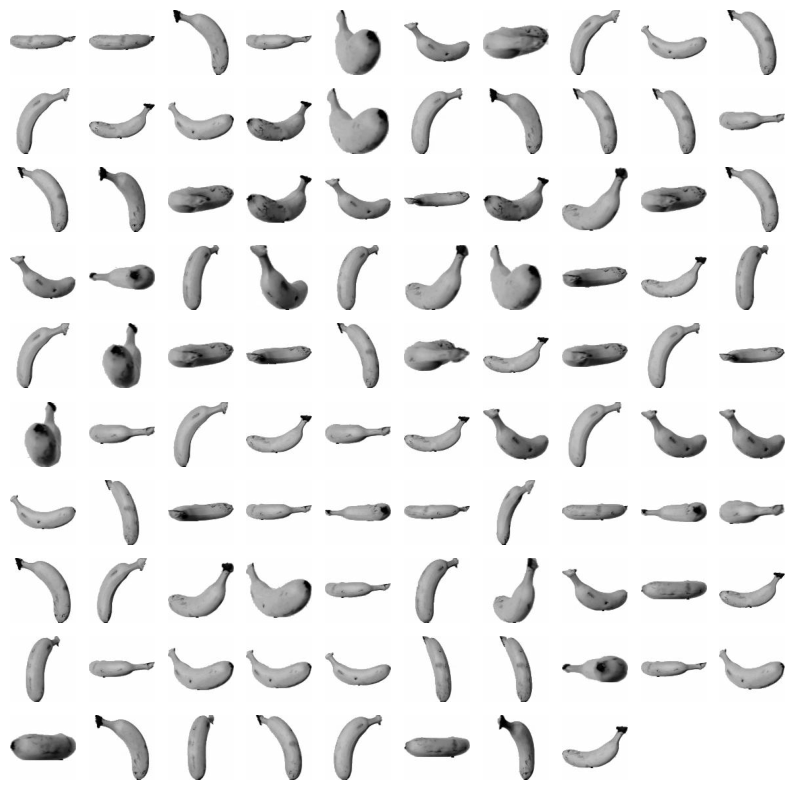

In [18]:
draw_fruits(fruits[km.labels_ == 1])

> 바나나 그림이 제일 많으므로, 클러스터 1은 바나나이다.

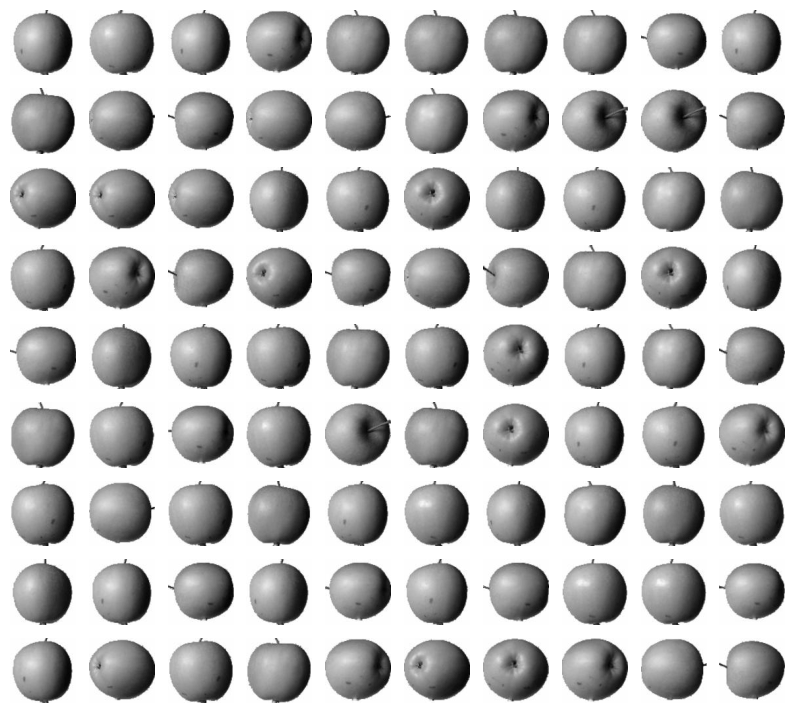

In [19]:
draw_fruits(fruits[km.labels_ == 2])

> 사과 그림이 제일 많으므로, 클러스터 2은 사과이다.

---
### 클러스터 중심 

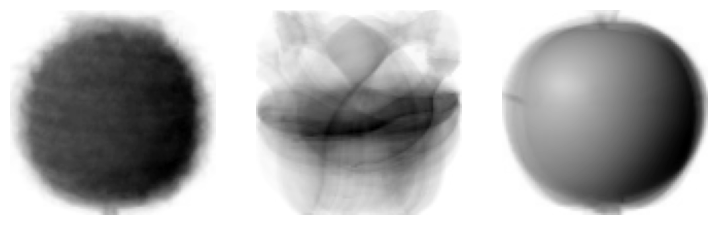

In [21]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [22]:
# 100번째 
print(km.predict(fruits_2d[100:101]))

[0]


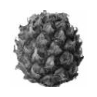

In [24]:
draw_fruits(fruits[100:101])

In [25]:
# 현 k-Means의 반복 횟수

km.n_iter_

4

---
### 최적의 k 찾기
- k-means에서는 k가 hyperparameter이므로 k값을 찾는것이 중요하다.

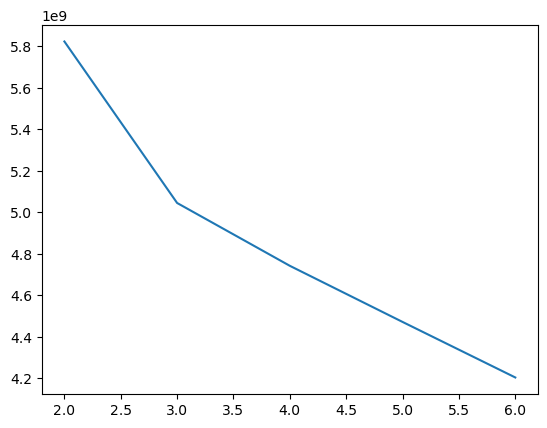

In [27]:
inertia = []

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)


plt.plot(
    range(2, 7),
    inertia
)

> elbow Method